# Prose baseline

To speed up computation, we preprocess and pickle the source prose corpus once:

In [ ]:
from src.baseline import preprocess_and_cache_prose_corpus
from src.prose import anabasis

cache = preprocess_and_cache_prose_corpus(
    anabasis,
    cache_file="data/cached_prose_corpus.pkl",)

1) Make and compile the prose baselines

In [2]:
import os
from tqdm import tqdm

from heatmaps import canticum_with_at_least_two_strophes
from src.compile import process_file
from src.baseline import make_prose_baseline
from results import victory_odes

def make_all_prose_baselines(responding_unit):

    for collection in ["olympians", "pythians", "nemeans", "isthmians"]:

        xml_path = f"data/compiled/{responding_unit}/ht_{collection}_{responding_unit}.xml"

        for responsion_id in tqdm(victory_odes):
            if not canticum_with_at_least_two_strophes(xml_path, responsion_id):
                #print(f"Skipping {responsion_id} in {collection} (less than 2 strophes).")
                continue
            make_prose_baseline(xml_path, responsion_id)

    baseline_scan_dir = "data/scan/baselines/triads/prose/"
    baseline_compiled_dir = "data/compiled/baselines/triads/prose/"

    baseline_xmls = os.listdir(baseline_scan_dir)
    for baseline_xml in baseline_xmls:
        if not baseline_xml.endswith(".xml"):
            continue
        infile = os.path.join(baseline_scan_dir, baseline_xml)
        outfile = os.path.join(baseline_compiled_dir, baseline_xml)
        process_file(infile, outfile)

make_all_prose_baselines("triads")


100%|██████████| 100/100 [00:00<00:00, 969.22it/s]


Writing prose baseline for responsion ol01 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1157.94it/s]


Writing prose baseline for responsion ol02 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 2561.61it/s]


Writing prose baseline for responsion ol03 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 4475.88it/s]


Writing prose baseline for responsion ol05 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1058.64it/s]


Writing prose baseline for responsion ol06 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1236.25it/s]


Writing prose baseline for responsion ol07 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1338.11it/s]


Writing prose baseline for responsion ol08 to data/scan/baselines/triads/prose/


 65%|██████▌   | 26/40 [00:01<00:01, 13.44it/s] 

Writing prose baseline for responsion ol09 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1113.42it/s]


Writing prose baseline for responsion ol10 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1009.39it/s]


Writing prose baseline for responsion ol13 to data/scan/baselines/triads/prose/


 80%|████████  | 32/40 [00:02<00:00, 12.49it/s]

Writing prose baseline for responsion ol14 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1190.49it/s]


Writing prose baseline for responsion py01 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 533.56it/s]


Writing prose baseline for responsion py02 to data/scan/baselines/triads/prose/


 80%|████████  | 32/40 [00:01<00:00, 23.65it/s]

Writing prose baseline for responsion py03 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 393.11it/s]


Writing prose baseline for responsion py04 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 945.78it/s]


Writing prose baseline for responsion py05 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 2043.19it/s]


Writing prose baseline for responsion py06 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1172.92it/s]


Writing prose baseline for responsion py08 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 868.09it/s]


Writing prose baseline for responsion py09 to data/scan/baselines/triads/prose/


 95%|█████████▌| 38/40 [00:02<00:00,  9.88it/s]

Writing prose baseline for responsion py10 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1794.62it/s]


Writing prose baseline for responsion py11 to data/scan/baselines/triads/prose/


100%|██████████| 40/40 [00:02<00:00, 13.60it/s]


Writing prose baseline for responsion py12 to data/scan/baselines/triads/prose/


 20%|██        | 8/40 [00:00<00:00, 38.03it/s]

Writing prose baseline for responsion ne01 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 4203.59it/s]


Writing prose baseline for responsion ne02 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1390.88it/s]


Writing prose baseline for responsion ne03 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1203.20it/s]


Writing prose baseline for responsion ne04 to data/scan/baselines/triads/prose/


 30%|███       | 12/40 [00:00<00:02, 12.33it/s]

Writing prose baseline for responsion ne05 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1563.34it/s]


Writing prose baseline for responsion ne06 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1118.57it/s]


Writing prose baseline for responsion ne07 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 2312.78it/s]


Writing prose baseline for responsion ne08 to data/scan/baselines/triads/prose/


 40%|████      | 16/40 [00:01<00:02,  8.65it/s]

Writing prose baseline for responsion ne09 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1148.78it/s]


Writing prose baseline for responsion ne10 to data/scan/baselines/triads/prose/


 45%|████▌     | 18/40 [00:01<00:02,  7.36it/s]

Writing prose baseline for responsion ne11 to data/scan/baselines/triads/prose/


  2%|▎         | 1/40 [00:00<00:05,  6.57it/s]

Writing prose baseline for responsion is01 to data/scan/baselines/triads/prose/


  5%|▌         | 2/40 [00:00<00:05,  7.03it/s]

Writing prose baseline for responsion is02 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1174.36it/s]


Writing prose baseline for responsion is04 to data/scan/baselines/triads/prose/


 10%|█         | 4/40 [00:00<00:05,  6.26it/s]

Writing prose baseline for responsion is05 to data/scan/baselines/triads/prose/


 12%|█▎        | 5/40 [00:00<00:05,  6.19it/s]

Writing prose baseline for responsion is06 to data/scan/baselines/triads/prose/


 15%|█▌        | 6/40 [00:00<00:05,  6.61it/s]

Writing prose baseline for responsion is07 to data/scan/baselines/triads/prose/


100%|██████████| 100/100 [00:00<00:00, 1356.34it/s]


Writing prose baseline for responsion is08 to data/scan/baselines/triads/prose/


100%|██████████| 40/40 [00:01<00:00, 32.56it/s]


Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_is08.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_py08.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_py09.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_ne08.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_ol09.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_ol08.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_ne09.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_ne04.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_ne10.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_py02.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_ol05.xml
Processed XML saved to data/compiled/baselines/triads/prose/baseline_prose_o

2. Compute stats!

In [1]:


from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

all_comp_ratios_bl = compatibility_corpus('data/compiled/baselines/triads/prose')
print("Ratio done.")
corpus_comp_stat_bl = compatibility_ratios_to_stats(all_comp_ratios_bl)
print(corpus_comp_stat_bl)

with open("results.py", "a") as f:
    f.write("\n")
    f.write()


100%|██████████| 40/40 [08:42<00:00, 13.07s/it]


Ratio done.
0.7502304988332094


In [2]:
all_comp_ratios = compatibility_corpus('data/compiled/triads/')
corpus_comp_stat = compatibility_ratios_to_stats(all_comp_ratios)
print(corpus_comp_stat)

100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

0.7749745915592592


3. Make heatmaps

In [ ]:
import os
from tqdm import tqdm

from heatmaps import make_one_heatmap_per_100_baselines

###### SETTINGS #######

responding_unit = "triads"  # "triads", "strophes"
overlay = False
dark = not overlay

#######################

in_folder = f"data/compiled/baselines/{responding_unit}/prose/"
out_folder = f"media/heatmaps/{responding_unit}/baselines/"

xmls = os.listdir(in_folder)
xmls = [f for f in xmls if f.endswith(".xml")]

for xml_file in tqdm(xmls):

    print(xml_file)
    responsion_id = xml_file.split('_')[2].replace('.xml', '')
    xml_path = os.path.join(in_folder, xml_file)

    if responding_unit == "strophes":
        title = f"Baseline Heatmap of {responsion_id} (Strophic-Antistrophic)"
    else:
        title = f"Baseline Heatmap of {responsion_id} (Triadic)"
    make_one_heatmap_per_100_baselines(xml_path, out_folder, responsion_id, title, save=True, show=False, dark_mode=dark)

print(len(os.listdir(out_folder)))

  2%|▎         | 1/40 [00:11<07:40, 11.81s/it]

[[[0.7142857142857143, 0.7142857142857143, 0.8571428571428571, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.8571428571428571, 0.8571428571428571, 1.0, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.7142857142857143, 0.7142857142857143, 0.5714285714285714, 0.7142857142857143, 0.7142857142857143, 0.5714285714285714, 1.0, 1.0], [0.8571428571428571, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.8571428571428571, 1.0, 1.0, 0.5714285714285714, 1.0, 1.0], [0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 0.5714285714285714, 0.8571428571428571, 0.8571428571428571], [0.7142857142857143, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.8571428571428571, 0.5714285714285714, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.8571428571428571, 1.0], 

  2%|▎         | 1/40 [00:14<09:19, 14.34s/it]


KeyboardInterrupt: 

  0%|          | 0/100 [00:00<?, ?it/s]

Generating baseline heatmap for is08_000...


  1%|          | 1/100 [00:00<01:27,  1.13it/s]

Generating baseline heatmap for is08_001...


  2%|▏         | 2/100 [00:01<01:12,  1.35it/s]

Generating baseline heatmap for is08_002...


  3%|▎         | 3/100 [00:02<01:07,  1.44it/s]

Generating baseline heatmap for is08_003...


  4%|▍         | 4/100 [00:02<01:07,  1.42it/s]

Generating baseline heatmap for is08_004...


  5%|▌         | 5/100 [00:03<01:05,  1.45it/s]

Generating baseline heatmap for is08_005...


  6%|▌         | 6/100 [00:04<01:03,  1.47it/s]

Generating baseline heatmap for is08_006...


  7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Generating baseline heatmap for is08_007...


  8%|▊         | 8/100 [00:05<01:00,  1.51it/s]

Generating baseline heatmap for is08_008...


  9%|▉         | 9/100 [00:06<00:59,  1.52it/s]

Generating baseline heatmap for is08_009...


  9%|▉         | 9/100 [00:06<01:08,  1.33it/s]


KeyboardInterrupt: 

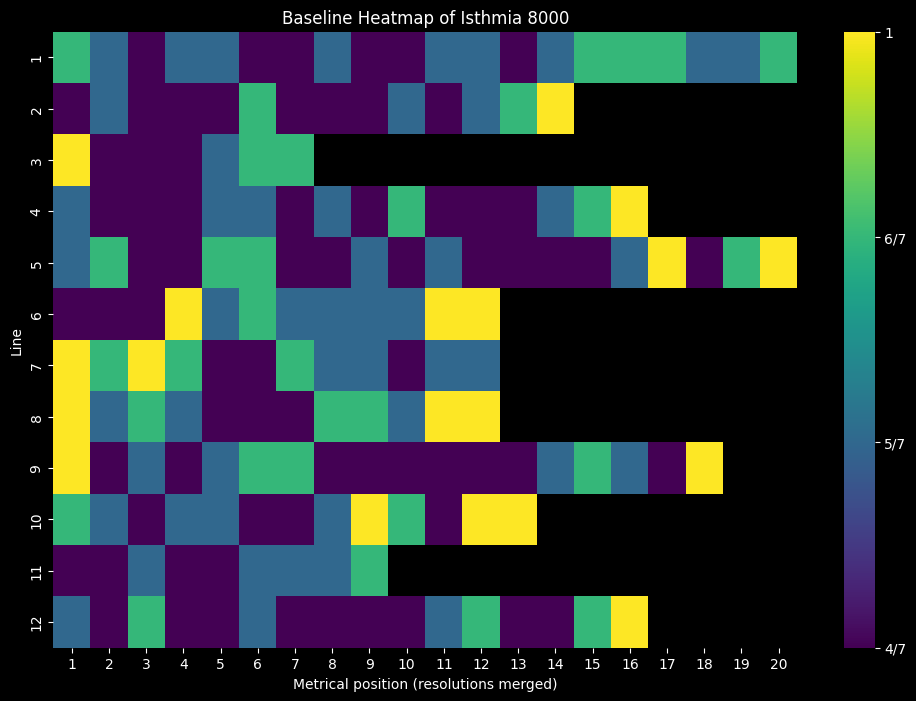

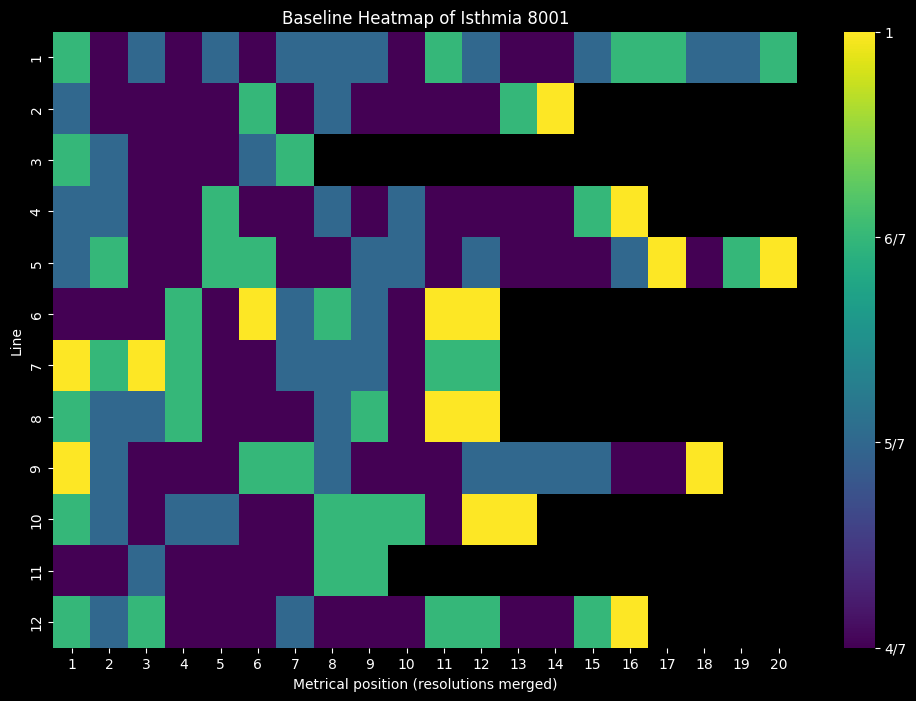

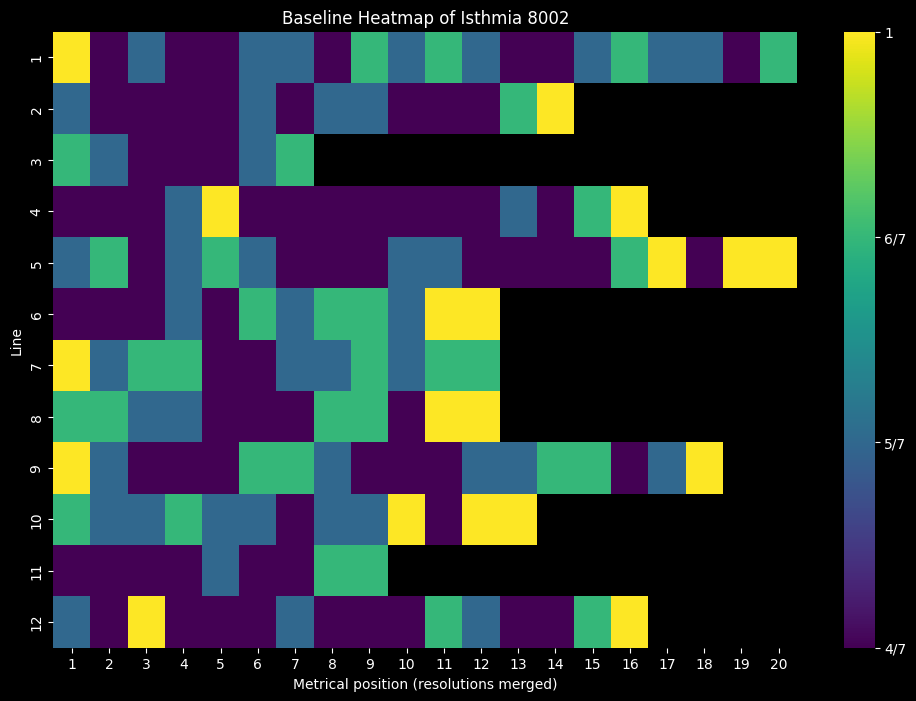

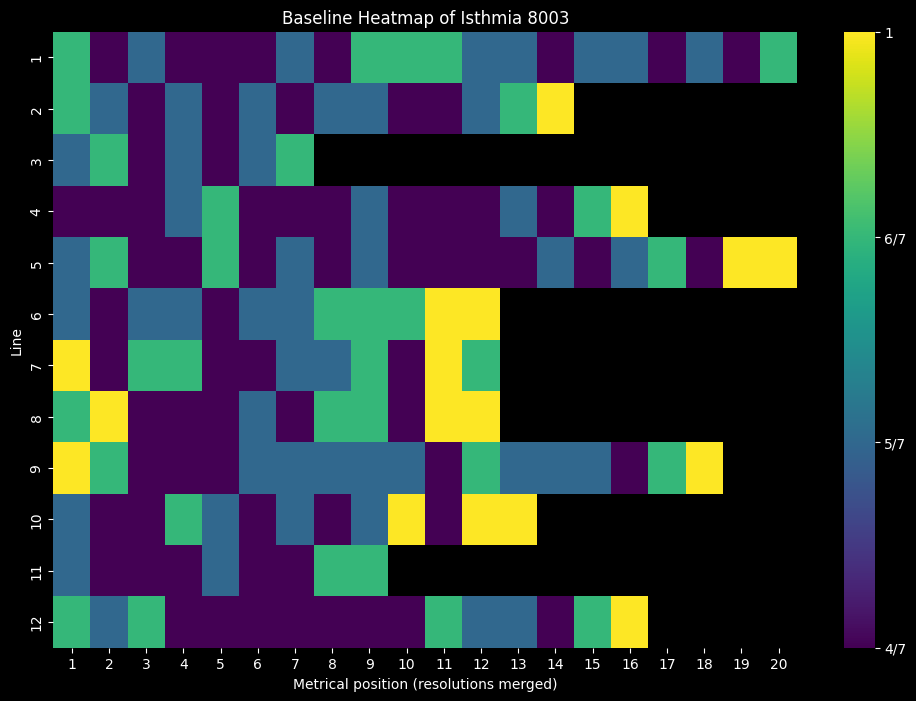

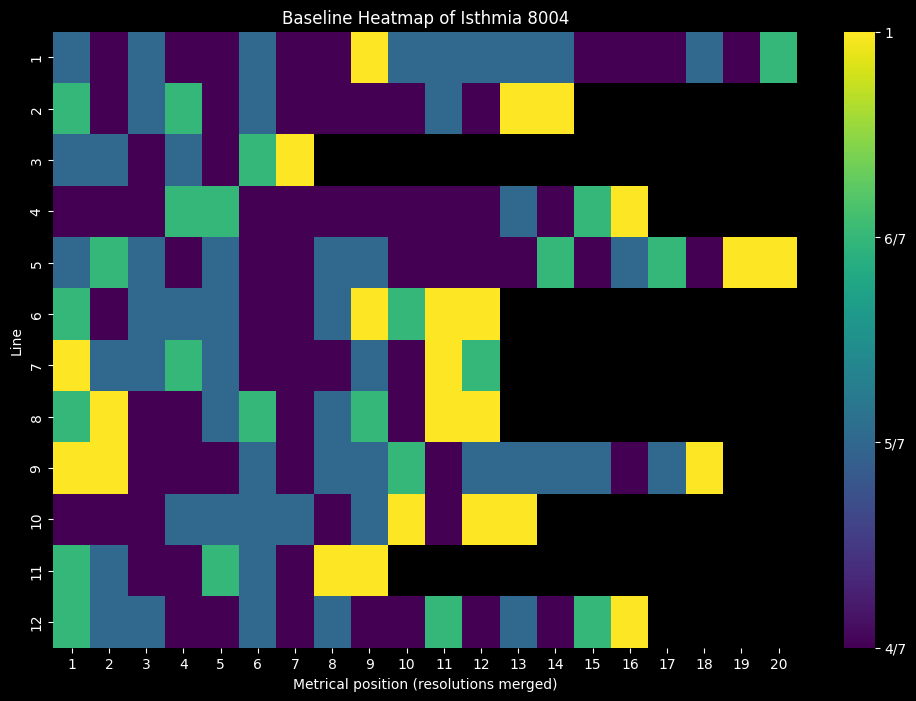

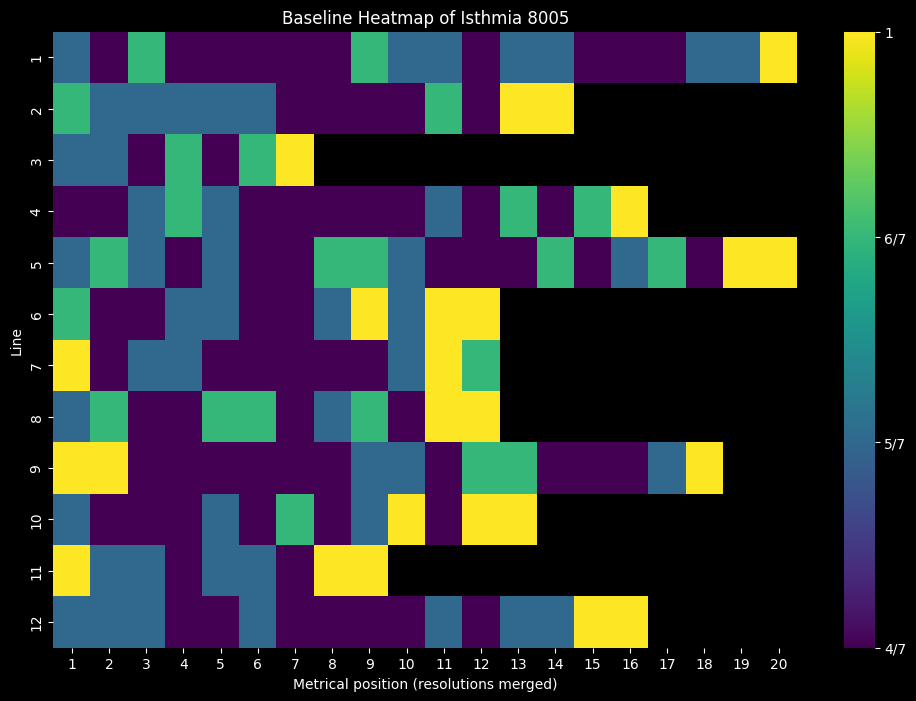

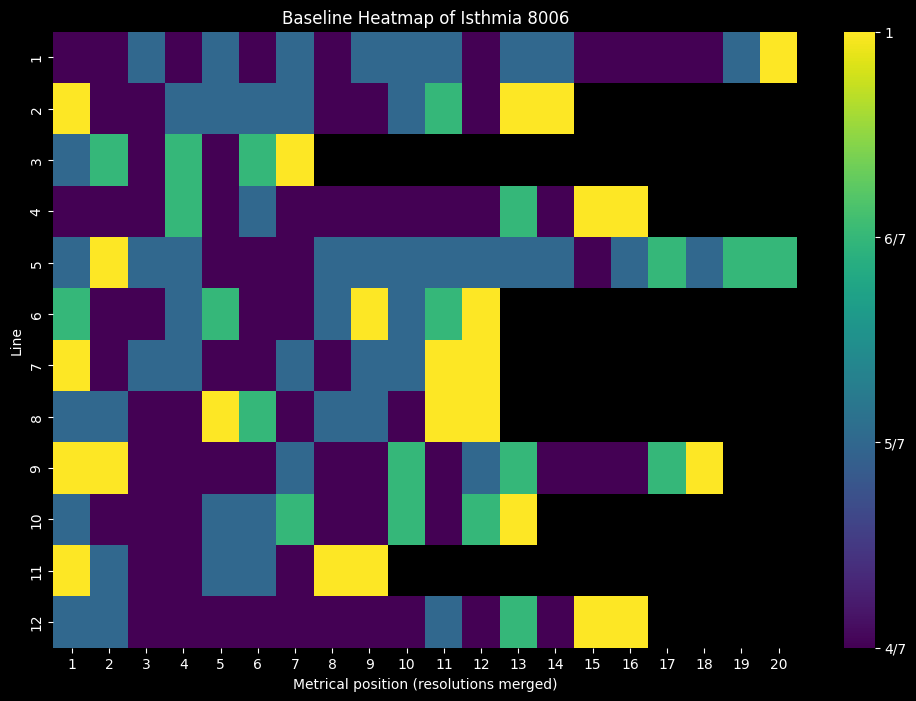

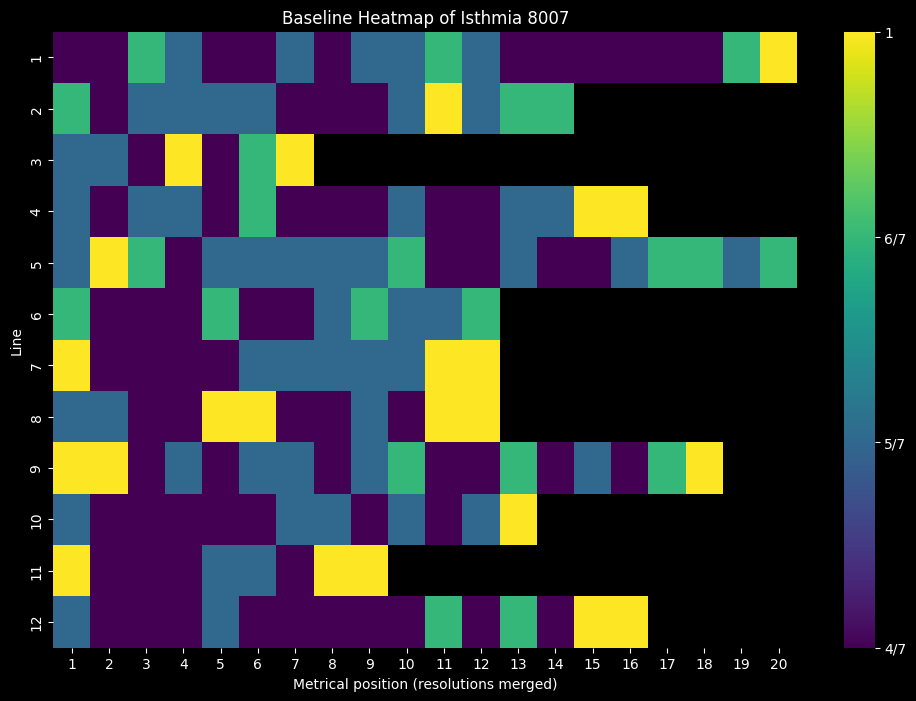

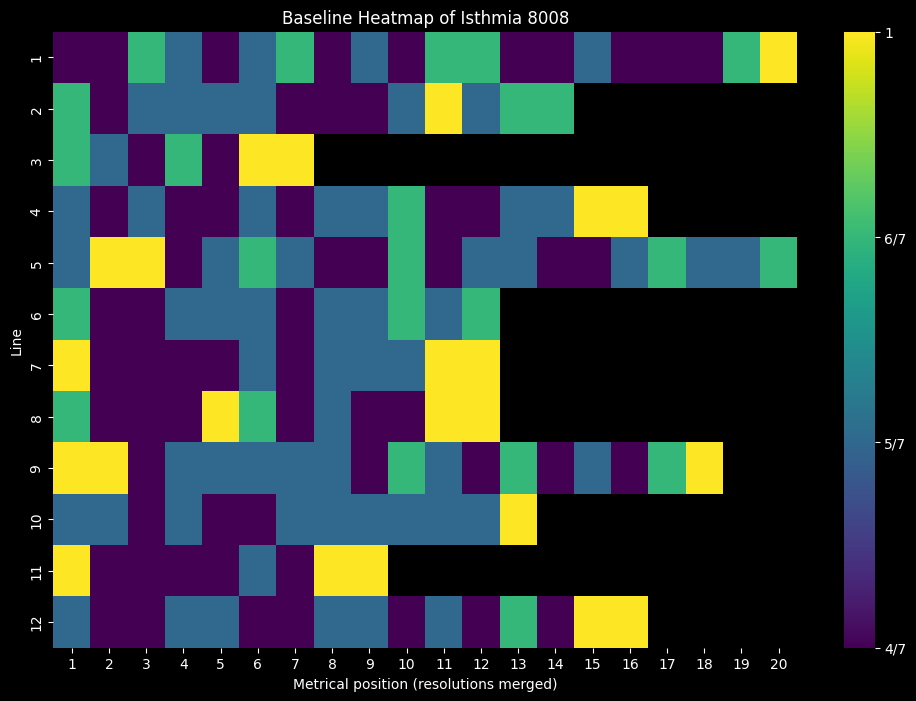

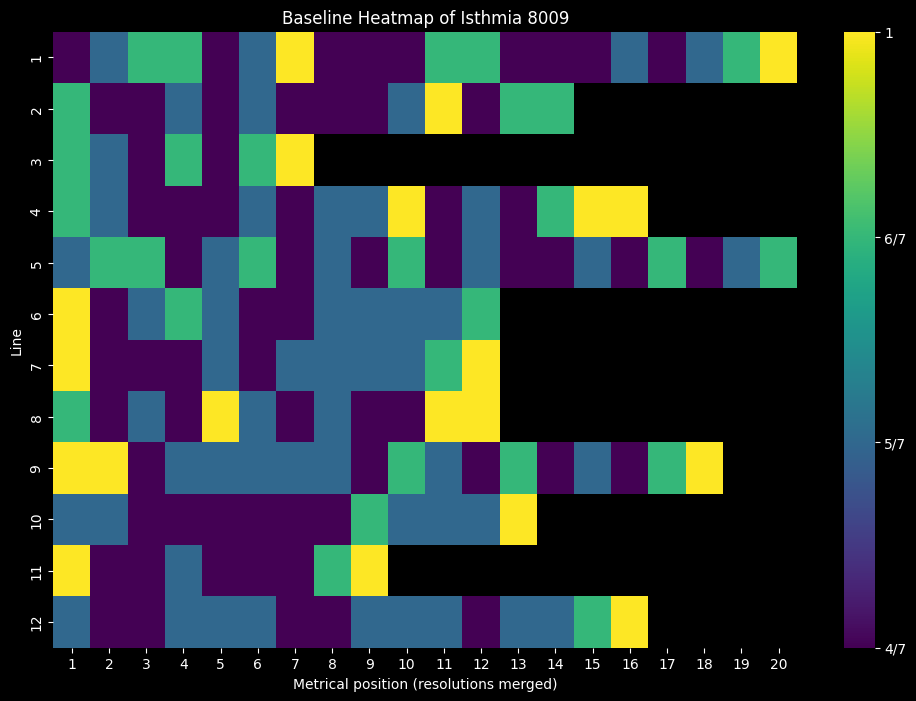

In [3]:
import os
from tqdm import tqdm

from src.utils.utils import get_canticum_ids
from heatmaps import canticum_with_at_least_two_strophes, make_one_heatmap

###### SETTINGS #######

responding_unit = "triads"  # "triads", "strophes"
overlay = False
dark = not overlay

#######################

in_folder = f"data/compiled/baselines/{responding_unit}/prose/"
out_folder = f"media/heatmaps/{responding_unit}/baselines/"

xmls = os.listdir(in_folder)
xmls = [f for f in xmls if f.endswith(".xml")]

for xml_file in xmls:

    xml_path = os.path.join(in_folder, xml_file)

    responsion_attributes = get_canticum_ids(xml_path)

    for responsion_attribute in tqdm(responsion_attributes):
        if not canticum_with_at_least_two_strophes(xml_path, responsion_attribute):
            print(f"Skipping {responsion_attribute} in {group[1]} (less than 2 strophes).")
            continue

        print(f"Generating baseline heatmap for {responsion_attribute}...")

        group = ""
        if responsion_attribute.startswith("ol"):
            group = "Olympia"
        elif responsion_attribute.startswith("py"):
            group = "Pythia"
        elif responsion_attribute.startswith("ne"):
            group = "Nemea"
        elif responsion_attribute.startswith("is"):
            group = "Isthmia"

        number = int(responsion_attribute[2:])

        if responding_unit == "strophes":
            title = f"Baseline Heatmap of {group} {number} (Strophic-Antistrophic)"
        else:
            title = f"Baseline Heatmap of {group} {number}"
        make_one_heatmap(xml_path, out_folder, responsion_attribute, title, representative_strophe=1, save=True, show=False, dark_mode=dark, text_overlay=overlay)

print(len(os.listdir(out_folder)))

## Gifs

In [10]:
from PIL import Image

png_files = [
    "media/plots/heatmap_notext_invertedcolours_pythia_4_comp.png",
    "media/plots/heatmap_notext_invertedcolours_pythia_4_comp_baseline.png"
]

frames = [Image.open(f).convert("P", palette=Image.ADAPTIVE, colors=256) for f in png_files]

frames[0].save(
    "baseline_animated_py04_PIL.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,  # ms
    loop=0,
    optimize=False
)